In [9]:
#loading necessary python modules
import numpy #mathematical data manipulation

import pandas #for manipulating numerical tables and time series

import matplotlib.pyplot #for plotting figures

In [10]:
#loading data
filename = './data/EarthChemCO.txt'

data=numpy.loadtxt(filename, delimiter=',',skiprows=1)

In [3]:
#viewing the data
print(data)
#Latitude (degrees), Longitude (degrees -180:180), Age (Ma), Iron abundence (ppm)

[[ 3.73947e+01 -1.04920e+02  2.23000e+01  1.40000e+00]
 [ 3.74314e+01 -1.05044e+02  2.23000e+01  5.20000e+00]
 [ 3.74315e+01 -1.04995e+02  2.25000e+01  9.30000e+00]
 ...
 [ 2.00530e+01  1.17419e+02  1.35200e-02  1.30000e+01]
 [ 2.00530e+01  1.17419e+02  1.37800e-02  1.60000e+01]
 [ 2.00530e+01  1.17419e+02  1.39800e-02  1.30000e+01]]


In [5]:
print(data.shape) #size of the data

(185871, 4)


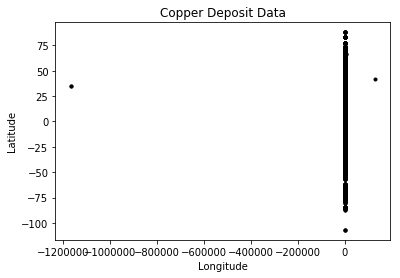

In [11]:
#Plot the lats and lons to see if they are correct
matplotlib.pyplot.plot(data[:,1],data[:,0],'k.')
matplotlib.pyplot.title('Copper Deposit Data')
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.show()

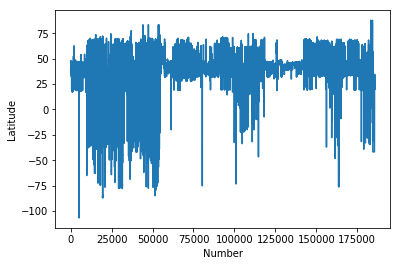

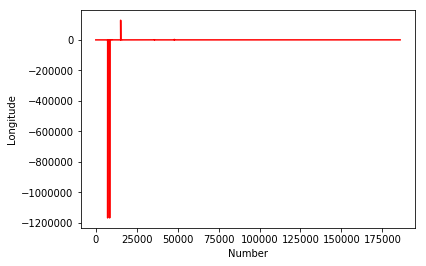

In [12]:
#checking the latitude and logitude data
#Plot the Latitudes
matplotlib.pyplot.plot(data[:,0])
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Number')
matplotlib.pyplot.show()

#Plot the Longitudes
matplotlib.pyplot.plot(data[:,1],'r')
matplotlib.pyplot.ylabel('Longitude')
matplotlib.pyplot.xlabel('Number')
matplotlib.pyplot.show()

In [13]:
#Clean up the data, remove anything outside lat lon extent

#longitude data points that are greater than -180, saved in a new variable
where_longitude_above_min = data[:,1]>-180
data1=data[where_longitude_above_min]
#Repeat for less than 180
where_longitude_below_max = data1[:,1]<180
data2=data1[where_longitude_below_max]

In [15]:
goodlat=data2[:,0]<90
print(goodlat)

[ True  True  True ...  True  True  True]


In [18]:
#Repeat for latitudes less than 90
data3=data2[data2[:,0]<90]
#Repeat for greater than -90
data4=data3[data3[:,0]>-90]

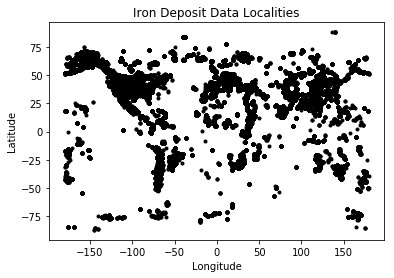

In [19]:
#plotting the location of each data point
matplotlib.pyplot.plot(data4[:,1],data4[:,0],'k.')
matplotlib.pyplot.title('Iron Deposit Data Localities')
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.show()

In [20]:
#viewing the new fixed data
print(data4)
#Latitude (degrees), Longitude (degrees -180:180), Age (Ma), Iron abundence (ppm)

[[ 3.73947e+01 -1.04920e+02  2.23000e+01  1.40000e+00]
 [ 3.74314e+01 -1.05044e+02  2.23000e+01  5.20000e+00]
 [ 3.74315e+01 -1.04995e+02  2.25000e+01  9.30000e+00]
 ...
 [ 2.00530e+01  1.17419e+02  1.35200e-02  1.30000e+01]
 [ 2.00530e+01  1.17419e+02  1.37800e-02  1.60000e+01]
 [ 2.00530e+01  1.17419e+02  1.39800e-02  1.30000e+01]]


In [21]:
print(data4.shape) #size of the new fixed data

(185856, 4)


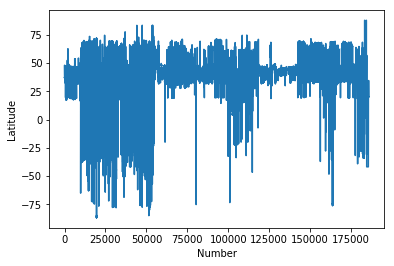

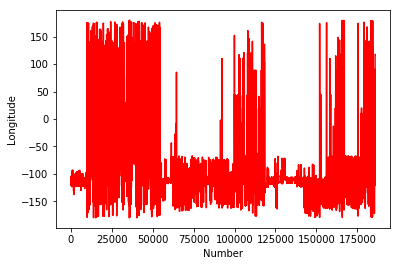

In [22]:
#rechecking the new latitude and logitude data (hopefully with bad data removed)
#Plot the Latitudes
matplotlib.pyplot.plot(data4[:,0])
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Number')
matplotlib.pyplot.show()

#Plot the Longitudes
matplotlib.pyplot.plot(data4[:,1],'r')
matplotlib.pyplot.ylabel('Longitude')
matplotlib.pyplot.xlabel('Number')
matplotlib.pyplot.show()

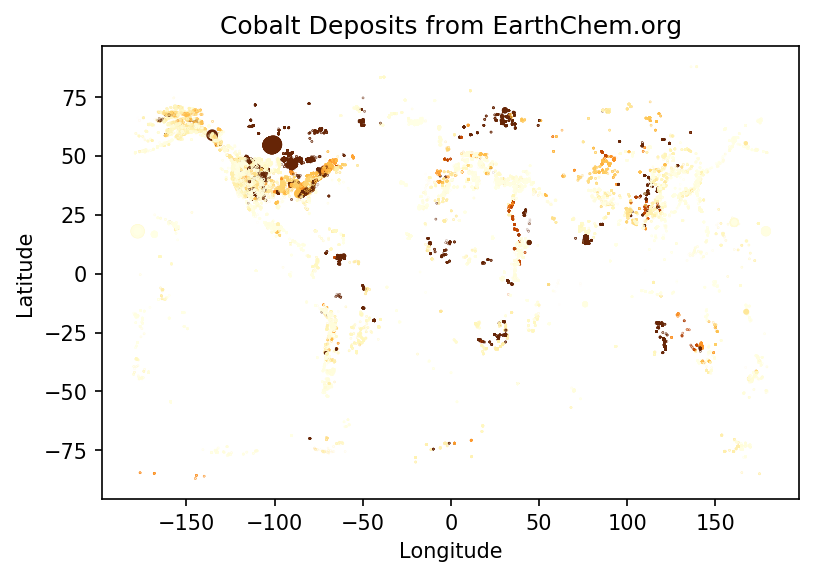

In [23]:
#ploting data points, sized by iron abundence and coloured by deposit age
lats=data4[:,0]
longs=data4[:,1]
age=data4[:,2]
abundance=data4[:,3]

fig = matplotlib.pyplot.figure(figsize=(6,4),dpi=150)

matplotlib.pyplot.scatter(longs,lats,s=abundance/1000,c=age,vmin=0, vmax=1000,cmap=matplotlib.pyplot.cm.YlOrBr)
matplotlib.pyplot.title('Cobalt Deposits from EarthChem.org')
matplotlib.pyplot.ylabel('Latitude')
matplotlib.pyplot.xlabel('Longitude')
matplotlib.pyplot.show()

In [24]:
#simple stats of Cobalt deposits age
print(min(age))
print(max(age))
print(numpy.mean(age))
print(numpy.median(age))

1e-06
4950.0
609.1218539967211
122.55


In [25]:
#simple stats of Cobalt abundence of deposits
print(min(abundance))
print(max(abundance))
print(numpy.mean(abundance))
print(numpy.median(abundance))

0.0002
69000.0
104.67529103550275
17.0


In [26]:
import cartopy.crs #module for plotting on a global map

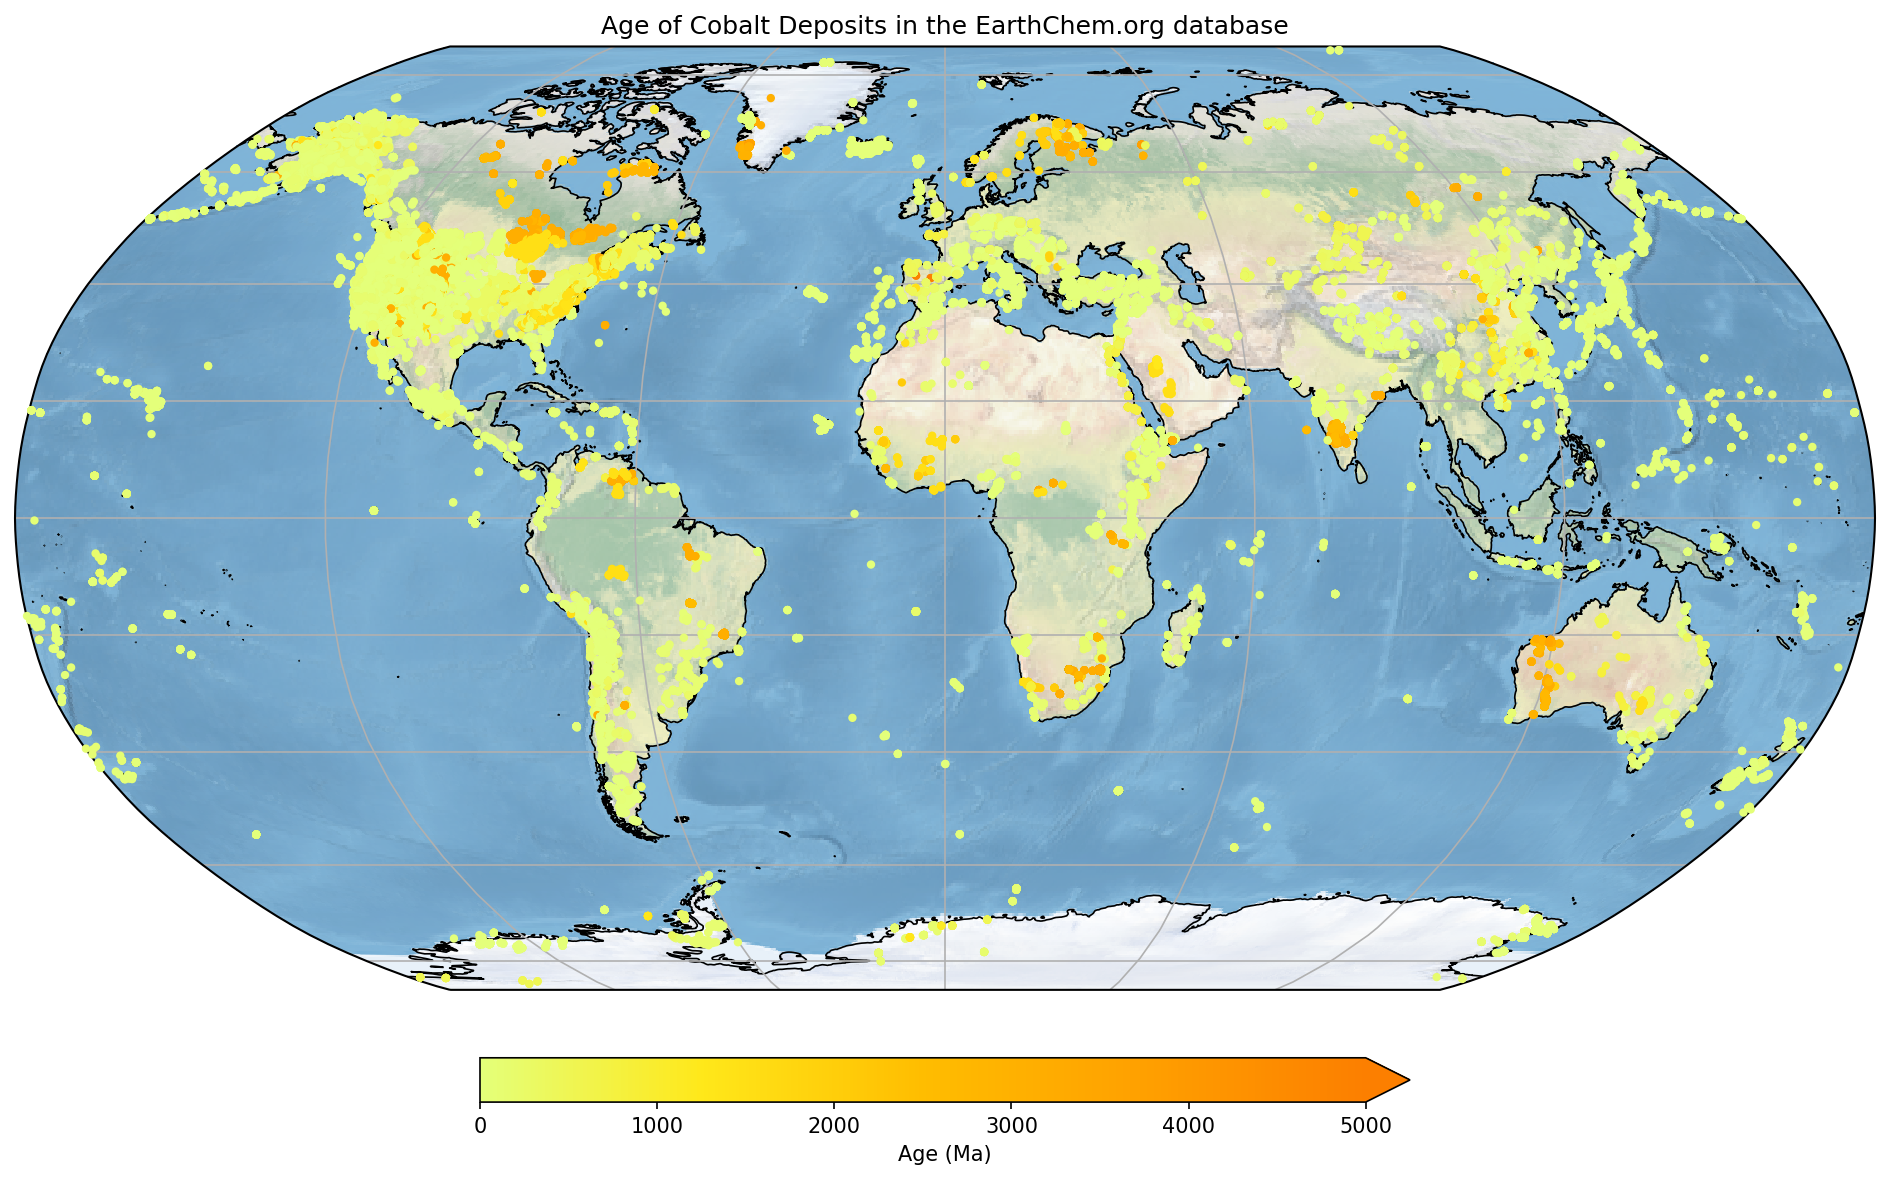

In [29]:
#Plotting final cobalt deposit age map
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson()) #map projection to plot over.

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#plotting cobalt age and location data
mapscat=ax.scatter(longs,lats,marker=".",c=age,vmin=0,vmax=5000,transform=cartopy.crs.Geodetic(),zorder=4,cmap=matplotlib.pyplot.cm.Wistia)

cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Age (Ma)')

matplotlib.pyplot.title('Age of Cobalt Deposits in the EarthChem.org database')
matplotlib.pyplot.show()

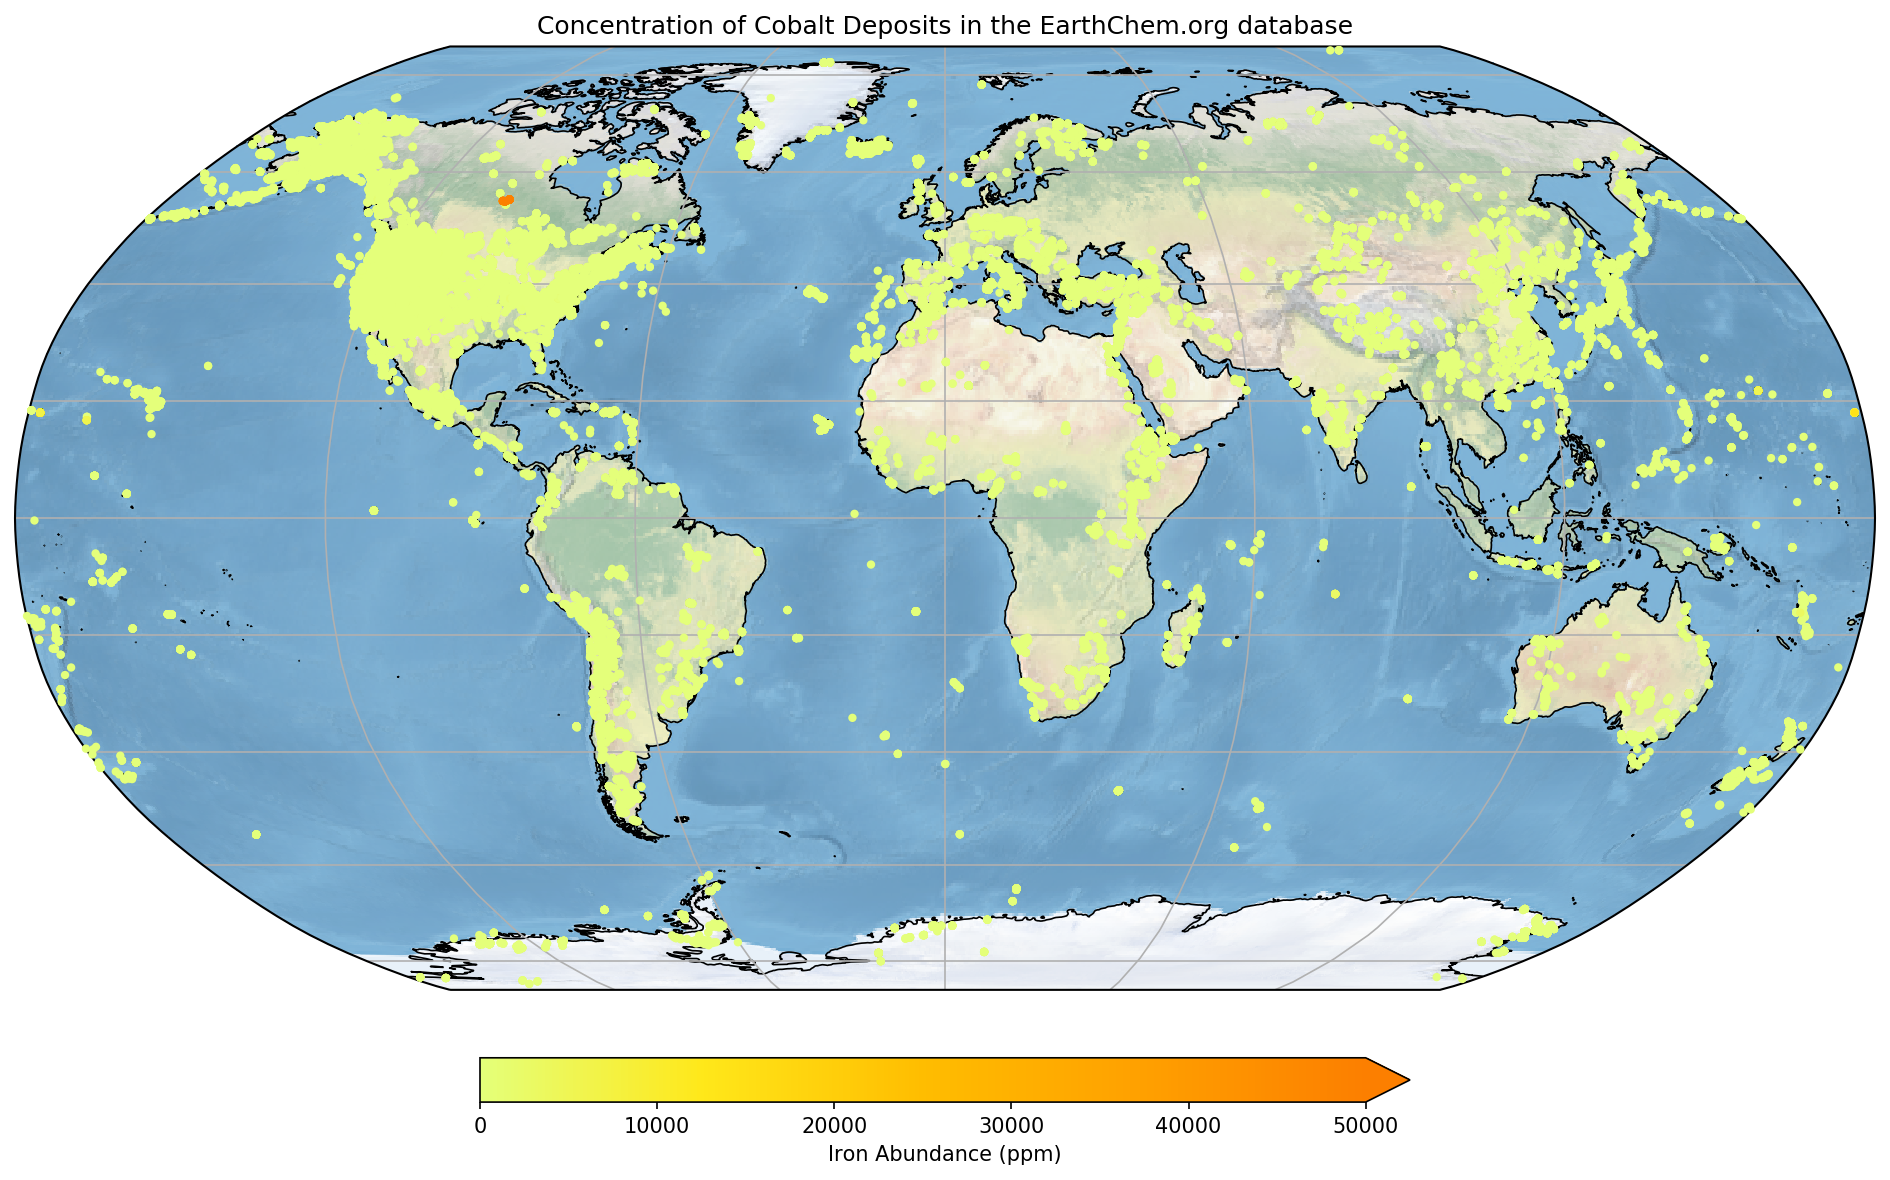

In [28]:
#Plotting final cobalt deposit concentrations map
fig = matplotlib.pyplot.figure(figsize=(16,12),dpi=150)

ax = matplotlib.pyplot.axes(projection=cartopy.crs.Robinson()) #map projection to plot over.

#Earth-specific details from cartopy module
ax.set_global()
ax.coastlines('50m', linewidth=0.8)
ax.stock_img()
ax.gridlines()

#plotting cobalt abundence and location data
mapscat=ax.scatter(longs,lats,marker=".",c=abundance,vmin=0,vmax=50000,transform=cartopy.crs.Geodetic(),zorder=4,cmap=matplotlib.pyplot.cm.Wistia)

cbar=matplotlib.pyplot.colorbar(mapscat, ax=ax, orientation="horizontal", pad=0.05, fraction=0.15, shrink=0.5,extend='max')
cbar.set_label('Iron Abundance (ppm)')

matplotlib.pyplot.title('Concentration of Cobalt Deposits in the EarthChem.org database')
matplotlib.pyplot.show()

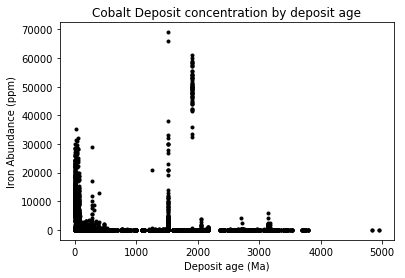

In [30]:
#plotting cobalt abumdence against deposit age
matplotlib.pyplot.plot(age,abundance,'k.')
matplotlib.pyplot.title('Cobalt Deposit concentration by deposit age')
matplotlib.pyplot.ylabel('Iron Abundance (ppm)')
matplotlib.pyplot.xlabel('Deposit age (Ma)')
matplotlib.pyplot.show()

Text(0, 0.5, 'count')

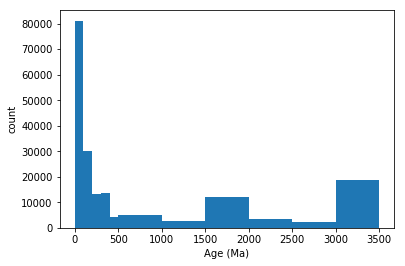

In [31]:
#histogram for cobalt deposit ages
mu = numpy.mean(age) #mean of distribution
sigma = numpy.std(age) #standard deviation
x = age

matplotlib.pyplot.hist(x, bins=[0,100,200,300,400,500,1000,1500,2000,2500,3000,3500])

matplotlib.pyplot.xlabel('Age (Ma)')
matplotlib.pyplot.ylabel('count')

Text(0, 0.5, 'count')

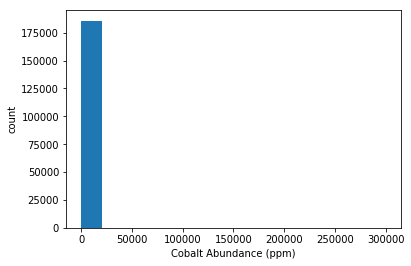

In [32]:
#histogram for cobalt deposit concentrations
mu = numpy.mean(abundance) #mean of distribution
sigma = numpy.std(abundance) #standard deviation
x = abundance

matplotlib.pyplot.hist(x, bins=[0,20000,40000,60000,80000,100000,200000,300000])

matplotlib.pyplot.xlabel('Cobalt Abundance (ppm)')
matplotlib.pyplot.ylabel('count')